# Extracting behavior features with ResNet50 pre-trained model  
### Re-evaluation - training data

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import PIL
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import h5py
from pickle import dump

 ## Loading and visualising frames 

4167


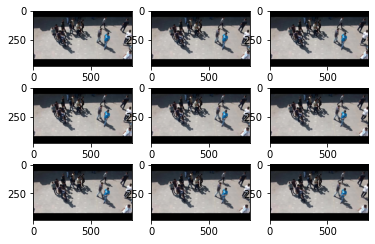

In [2]:
behavior = pd.read_csv('data/MotionEmotion/reduced_beh_labelled_dataset.csv')
behavior = behavior.rename(columns={'Unnamed: 0':'org_idx'}) 
paths = behavior.path
label = behavior.label
print(len(paths))
for i in range(9):
    plt.subplot(330 + 1 + i)
    #print(file_list[i])
    filename = paths[i]
    image = imread(filename)
    plt.imshow(image)

In [3]:
image = Image.open(paths[1]) #reading image format
print(image.format) 
data = asarray(image) #converting image into array
print(data.shape)

JPEG
(480, 854, 3)


## Feeding feature extractor with images 
### Specifications: 

Model: ResNet50 - pretrained

Weights: Imagnet

Input: 224,224 

Output: 1, 2048
    
    Which are the number of features extracted per frame. The last FC layer which carries out the classification 
    is not being used. 
    Layer: avg_pool (GlobalAveragePooling2D) output shape:(none, 2048) # of params: 0 connected to
       ['conv5_block3_out[0][0]']  
 

In [4]:
def feature_extraction(images):
    paths = images
    features = []
    for image in paths: 
        images_ = load_img(image, target_size=(224, 224))
        # convert the image pixels to a numpy array
        images_ = img_to_array(images_)
        # reshape data for the model
        images_ = images_.reshape((1, images_.shape[0], images_.shape[1], images_.shape[2])) # prepare the image for the model
        images_ = preprocess_input(images_)
        # load model
        model = ResNet50(weights="imagenet") 
        # remove the output layer
        model = Model(inputs=model.inputs, outputs=model.layers[-2].output) 
        # get extracted features
        features_ = model.predict(images_)
        print(features_.shape)
        features.append(features_)
    model.summary()
    return features

In [5]:
features_extracted = feature_extraction(paths)


2022-04-29 13:12:59.543965: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


 conv2_block2_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block2_1_relu[0][0]']    
                                                                                                  
 conv2_block2_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block2_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block2_3_conv (Conv2D)   (None, 56, 56, 256)  16640       ['conv2_block2_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_0_conv (Conv2D)   (None, 14, 14, 1024  525312      ['conv3_block4_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block1_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block1_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block1_0_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block4_1_relu[0][0]']    
                                                                                                  
 conv4_block4_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block4_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block4_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block4_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv5_block1_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_2_conv (Conv2D)   (None, 7, 7, 512)    2359808     ['conv5_block1_1_relu[0][0]']    
                                                                                                  
 conv5_block1_2_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block1_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_2_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block1_2_bn[0][0]']      
 n)                                                                                               
          

__________________________________________________________________________________________________


In [6]:
len(features_extracted)

4167

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import scipy

train_features = np.array(features_extracted).reshape(len(features_extracted) ,-1) 
train_features = StandardScaler().fit_transform(train_features)
train_features

array([[-0.4334038 , -0.6615324 , -0.45956627, ..., -0.00404029,
         2.178506  , -0.6353247 ],
       [-0.67731947, -0.61064863, -0.58226067, ...,  0.00570867,
         1.6099811 , -0.44689283],
       [-0.5315607 , -0.5046113 , -0.58226067, ..., -0.1860753 ,
         2.0966785 , -0.3597417 ],
       ...,
       [-0.1537098 ,  2.6598282 ,  0.15890624, ...,  0.6700438 ,
        -0.6221391 ,  1.1979212 ],
       [ 0.13618574,  2.932042  ,  0.0139918 , ...,  0.7134216 ,
        -0.6221391 ,  1.3269048 ],
       [ 0.03242461,  3.2542446 , -0.02362042, ...,  0.40824312,
        -0.6221391 ,  1.3658919 ]], dtype=float32)

### Saving extracted features as csv files

In [8]:
from numpy import savetxt
k=0 
for i in train_features:
    #print(i)
    k +=1
    #print(j)
    savetxt('data/all_features/ResNet_beh/data'+ str(k) +'.csv', i, delimiter=',')
    
